# British Airways reviews sentimental analysis
## Problem Statement:
British Airways wishes to analyse the sentiments of it's reviews available on Skytrax. 

## Business Goal:
- To notice any paricular sentimental trends visible in reviews for british airways
- Sentimental analysis of reviews and detection of interaction points between customer and company for the sentiment.

### Scraping reviews from the website and cleaning the data

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [68]:
#scraping the data using beautiful soup
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []
date = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    soup = BeautifulSoup(content, 'html.parser')
    for para in soup.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    temp = soup.find_all("time")
    
    for val in temp:
        a = str(val).split(" ")[1]
        date.append(a[10:-1])      

print()
print(f"{len(reviews)} total reviews")
print(f"{len(date)} total dates")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10

1000 total reviews
1000 total dates


In [69]:
#removing all the unnecessary parts prior to the review starting 
text = []

for i in reviews:
    a = str(i).split("|")
    text.append(a[1])

In [70]:
df = pd.DataFrame({
    "reviews": text, 
    "date" : date})
df["date"] = pd.to_datetime(df["date"])

df.head()

,reviews,date
0,"\r\nThe flights were all on time, except Bel...",2023-05-17
1,Only the second time flying BA as first time ...,2023-05-14
2,I wasn't going to bother reviewing this fligh...,2023-05-14
3,I booked business class tickets for my fianc...,2023-05-13
4,I will never travel with British Airways aga...,2023-05-08


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   reviews  1000 non-null   object        
 1   date     1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [73]:
print("Upper half data: ")
print()
print(df.head())
print()
print("Lower half data: ")
print()
print(df.tail())

Upper half data: 

                                             reviews       date
0    \r\nThe flights were all on time, except Bel... 2023-05-17
1   Only the second time flying BA as first time ... 2023-05-14
2   I wasn't going to bother reviewing this fligh... 2023-05-14
3    I booked business class tickets for my fianc... 2023-05-13
4    I will never travel with British Airways aga... 2023-05-08

Lower half data: 

                                               reviews       date
995    Luggage broken into – no explanation. First ... 2018-07-12
996    London to Tehran back in August 2017. The ca... 2018-07-10
997    Pisa to London Heathrow. Having booked and p... 2018-07-10
998    I recently took a first class flight from Lo... 2018-07-10
999    Had four flights in total with this airline,... 2018-07-09


Our reviews range from July 2018 to May 2023.

In [75]:
df['Month_Year'] = df['date'].dt.strftime('%b-%Y')
df.head()

,reviews,date,Month_Year
0,"\r\nThe flights were all on time, except Bel...",2023-05-17,May-2023
1,Only the second time flying BA as first time ...,2023-05-14,May-2023
2,I wasn't going to bother reviewing this fligh...,2023-05-14,May-2023
3,I booked business class tickets for my fianc...,2023-05-13,May-2023
4,I will never travel with British Airways aga...,2023-05-08,May-2023


#### Analysis pproach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules known as lexicons based on which the text is labeled as positive/negative/neutral. This will be followed by simple exploratory data analysis and wordclouds in order to get the necessary information to meet our business goals

### Data preprocessing steps:

#### Cleaning the text
Intial cleaning of the corpus involves removal of common abbrevations, punctuations and numbers.

In [76]:
import re

# Defining a function to clean the text i.e. removal of all punctuations and numbers
def clean(text):
   
    # expanding shortened words before removal of punctuations and special characters
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"\bdon't\b", "do not", text)
    text = re.sub(r"\bdoesn't\b", "does not", text)
    text = re.sub(r"\bdidn't\b", "did not", text)
    text = re.sub(r"\bdidnt\b", "did not", text)
    text = re.sub(r"\bhasn't\b", "has not", text)
    text = re.sub(r"\bhaven't\b", "have not", text)
    text = re.sub(r"\bhavent\b", "have not", text)
    text = re.sub(r"\bhadn't\b", "had not", text)
    text = re.sub(r"\bwon't\b", "will not", text)
    text = re.sub(r"\bwouldn't\b", "would not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)

    # using regular expressions to expand the contractions
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    #removing numbers, punctuations and special characters:
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['cleaned_reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,date,Month_Year,cleaned_reviews
0,"\r\nThe flights were all on time, except Bel...",2023-05-17,May-2023,The flights were all on time except Belfast f...
1,Only the second time flying BA as first time ...,2023-05-14,May-2023,Only the second time flying BA as first time ...
2,I wasn't going to bother reviewing this fligh...,2023-05-14,May-2023,I was not going to bother reviewing this flig...
3,I booked business class tickets for my fianc...,2023-05-13,May-2023,I booked business class tickets for my fianc ...
4,I will never travel with British Airways aga...,2023-05-08,May-2023,I will never travel with British Airways agai...


### Tokenisation, POS tagging and Stopword removal

Tokenizing the text on a word level and tagging the different parts of speech(POS) along with removal of stopwords (words occuring frequently that have no sentimental value in the corpus)

In [11]:
#importing necessary libraries for corpus editing 
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/BlueLover/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/BlueLover/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/BlueLover/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/BlueLover/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/BlueLover/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
# POS tagger dictionary
pos_dict = {'N':wordnet.NOUN, 'V':wordnet.VERB, 'J':wordnet.ADJ, 'R':wordnet.ADV, }
def token_pos_stop(text):
    tags = pos_tag(word_tokenize(text))  #tokenizing and POS-tagging the tokens
    word_list = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')): #excluding stopwords
            word_list.append(tuple([word, pos_dict.get(tag[0])]))
    return word_list

temp_df = pd.DataFrame()
temp_df['POS_tagged'] = df['cleaned_reviews'].apply(token_pos_stop)
temp_df.head()

,POS_tagged
0,"[(flights, n), (time, n), (except, None), (Bel..."
1,"[(second, a), (time, n), (flying, v), (BA, n),..."
2,"[(going, v), (bother, v), (reviewing, v), (fli..."
3,"[(booked, v), (business, n), (class, n), (tick..."
4,"[(never, r), (travel, v), (British, a), (Airwa..."


### Lemmatization of the relevant corpus

POS_tagged words are lemmatized to their base form to simplify the information enough to get the sentiment

In [77]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemmatized_text'] = temp_df['POS_tagged'].apply(lemmatize)
df.head()

,reviews,date,Month_Year,cleaned_reviews,Lemmatized_text
0,"\r\nThe flights were all on time, except Bel...",2023-05-17,May-2023,The flights were all on time except Belfast f...,flight time except Belfast London never Staf...
1,Only the second time flying BA as first time ...,2023-05-14,May-2023,Only the second time flying BA as first time ...,second time fly BA first time positive Could...
2,I wasn't going to bother reviewing this fligh...,2023-05-14,May-2023,I was not going to bother reviewing this flig...,go bother review flight seem perpetual downe...
3,I booked business class tickets for my fianc...,2023-05-13,May-2023,I booked business class tickets for my fianc ...,book business class ticket fianc reschedule ...
4,I will never travel with British Airways aga...,2023-05-08,May-2023,I will never travel with British Airways agai...,never travel British Airways spend business ...


In [14]:
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [16]:
pos=neg=obj=count=0
lemmatizer = WordNetLemmatizer()

postagging = []

for review in df['Lemmatized_text']:
    list = word_tokenize(review)
    postagging.append(nltk.pos_tag(list))

temp_df['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
    ###################################################################################

senti_score = []

for pos_val in temp_df['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
temp_df['swn_senti_score'] = senti_score
print(temp_df['swn_senti_score'])

print(temp_df.head())

0      0.125
1      1.625
2      0.250
3     -0.875
4     -2.375
       ...  
995    0.750
996   -0.750
997   -1.000
998    0.125
999   -3.000
Name: swn_senti_score, Length: 1000, dtype: float64
                                          POS_tagged  \
0  [(flights, n), (time, n), (except, None), (Bel...   
1  [(second, a), (time, n), (flying, v), (BA, n),...   
2  [(going, v), (bother, v), (reviewing, v), (fli...   
3  [(booked, v), (business, n), (class, n), (tick...   
4  [(never, r), (travel, v), (British, a), (Airwa...   

                                            pos_tags  swn_senti_score  
0  [(flight, NN), (time, NN), (except, IN), (Belf...            0.125  
1  [(second, JJ), (time, NN), (fly, NN), (BA, NNP...            1.625  
2  [(go, VB), (bother, RB), (review, NN), (flight...            0.250  
3  [(book, NN), (business, NN), (class, NN), (tic...           -0.875  
4  [(never, RB), (travel, VBP), (British, JJ), (A...           -2.375  


In [78]:
overall=[]
for i in range(len(temp_df)):
    if temp_df['swn_senti_score'][i]>= 0.05:
        overall.append(1)
    elif temp_df['swn_senti_score'][i]<= -0.05:
        overall.append(-1)
    else:
        overall.append(0)
df['swn_sentiment_analysis']=overall

df.head()

,reviews,date,Month_Year,cleaned_reviews,Lemmatized_text,swn_sentiment_analysis
0,"\r\nThe flights were all on time, except Bel...",2023-05-17,May-2023,The flights were all on time except Belfast f...,flight time except Belfast London never Staf...,1
1,Only the second time flying BA as first time ...,2023-05-14,May-2023,Only the second time flying BA as first time ...,second time fly BA first time positive Could...,1
2,I wasn't going to bother reviewing this fligh...,2023-05-14,May-2023,I was not going to bother reviewing this flig...,go bother review flight seem perpetual downe...,1
3,I booked business class tickets for my fianc...,2023-05-13,May-2023,I booked business class tickets for my fianc ...,book business class ticket fianc reschedule ...,-1
4,I will never travel with British Airways aga...,2023-05-08,May-2023,I will never travel with British Airways agai...,never travel British Airways spend business ...,-1


In [22]:
# function to calculate textblob sentiment
from textblob import TextBlob

def TBanalyzer(text):
    text_blob_object = TextBlob(text)
    return text_blob_object.sentiment.polarity

temp_df['tb_senti_score'] = df['Lemmatized_text'].apply(TBanalyzer)
print(temp_df.head())

                                          POS_tagged  \
0  [(flights, n), (time, n), (except, None), (Bel...   
1  [(second, a), (time, n), (flying, v), (BA, n),...   
2  [(going, v), (bother, v), (reviewing, v), (fli...   
3  [(booked, v), (business, n), (class, n), (tick...   
4  [(never, r), (travel, v), (British, a), (Airwa...   

                                            pos_tags  swn_senti_score  \
0  [(flight, NN), (time, NN), (except, IN), (Belf...            0.125   
1  [(second, JJ), (time, NN), (fly, NN), (BA, NNP...            1.625   
2  [(go, VB), (bother, RB), (review, NN), (flight...            0.250   
3  [(book, NN), (business, NN), (class, NN), (tic...           -0.875   
4  [(never, RB), (travel, VBP), (British, JJ), (A...           -2.375   

   tb_senti_score  
0        0.066667  
1        0.073136  
2        0.144452  
3        0.092708  
4       -0.046433  


In [79]:
overall=[]
for i in range(len(temp_df)):
    if temp_df['tb_senti_score'][i]>= 0.05:
        overall.append(1)
    elif temp_df['tb_senti_score'][i]<= -0.05:
        overall.append(-1)
    else:
        overall.append(0)
df['tb_sentiment_analysis']=overall

df.head()

,reviews,date,Month_Year,cleaned_reviews,Lemmatized_text,swn_sentiment_analysis,tb_sentiment_analysis
0,"\r\nThe flights were all on time, except Bel...",2023-05-17,May-2023,The flights were all on time except Belfast f...,flight time except Belfast London never Staf...,1,1
1,Only the second time flying BA as first time ...,2023-05-14,May-2023,Only the second time flying BA as first time ...,second time fly BA first time positive Could...,1,1
2,I wasn't going to bother reviewing this fligh...,2023-05-14,May-2023,I was not going to bother reviewing this flig...,go bother review flight seem perpetual downe...,1,1
3,I booked business class tickets for my fianc...,2023-05-13,May-2023,I booked business class tickets for my fianc ...,book business class ticket fianc reschedule ...,-1,1
4,I will never travel with British Airways aga...,2023-05-08,May-2023,I will never travel with British Airways agai...,never travel British Airways spend business ...,-1,0


### Sentiment Analysis using VADER

In [80]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

temp_df['v_Sentiment'] = df['Lemmatized_text'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 1
    elif compound < 0 :
        return -1
    else:
        return 0
df['v_sentiment_analysis'] = temp_df['v_Sentiment'].apply(vader_analysis)
df.head()

,reviews,date,Month_Year,cleaned_reviews,Lemmatized_text,swn_sentiment_analysis,tb_sentiment_analysis,v_sentiment_analysis
0,"\r\nThe flights were all on time, except Bel...",2023-05-17,May-2023,The flights were all on time except Belfast f...,flight time except Belfast London never Staf...,1,1,-1
1,Only the second time flying BA as first time ...,2023-05-14,May-2023,Only the second time flying BA as first time ...,second time fly BA first time positive Could...,1,1,1
2,I wasn't going to bother reviewing this fligh...,2023-05-14,May-2023,I was not going to bother reviewing this flig...,go bother review flight seem perpetual downe...,1,1,1
3,I booked business class tickets for my fianc...,2023-05-13,May-2023,I booked business class tickets for my fianc ...,book business class ticket fianc reschedule ...,-1,1,-1
4,I will never travel with British Airways aga...,2023-05-08,May-2023,I will never travel with British Airways agai...,never travel British Airways spend business ...,-1,0,-1


As visible and understandable we can see that three different packages interpret our data very differently. We shallnow create and average of the three analysis to know the true sentiment of our review.

In [81]:
df["Sentiment"] = df[["swn_sentiment_analysis", "tb_sentiment_analysis", "v_sentiment_analysis"]].mean(axis = 1)

#function to round off sentiment values
def round_off(value):
    if value >= 0.5:
        return 1
    elif value < 0 :
        return -1
    else:
        return 0

df["Sentiment"]= df["Sentiment"].apply(round_off)
df.head()

,reviews,date,Month_Year,cleaned_reviews,Lemmatized_text,swn_sentiment_analysis,tb_sentiment_analysis,v_sentiment_analysis,Sentiment
0,"\r\nThe flights were all on time, except Bel...",2023-05-17,May-2023,The flights were all on time except Belfast f...,flight time except Belfast London never Staf...,1,1,-1,0
1,Only the second time flying BA as first time ...,2023-05-14,May-2023,Only the second time flying BA as first time ...,second time fly BA first time positive Could...,1,1,1,1
2,I wasn't going to bother reviewing this fligh...,2023-05-14,May-2023,I was not going to bother reviewing this flig...,go bother review flight seem perpetual downe...,1,1,1,1
3,I booked business class tickets for my fianc...,2023-05-13,May-2023,I booked business class tickets for my fianc ...,book business class ticket fianc reschedule ...,-1,1,-1,-1
4,I will never travel with British Airways aga...,2023-05-08,May-2023,I will never travel with British Airways agai...,never travel British Airways spend business ...,-1,0,-1,-1


In [82]:
#adding context for ease of interpretability 
def senti(value):
    if value == 1:
        return "positive"
    elif value < 0 :
        return "negative"
    else:
        return "neutral"

df["Sentiment_analysis"]= df["Sentiment"].apply(senti)
df.head()

,reviews,date,Month_Year,cleaned_reviews,Lemmatized_text,swn_sentiment_analysis,tb_sentiment_analysis,v_sentiment_analysis,Sentiment,Sentiment_analysis
0,"\r\nThe flights were all on time, except Bel...",2023-05-17,May-2023,The flights were all on time except Belfast f...,flight time except Belfast London never Staf...,1,1,-1,0,neutral
1,Only the second time flying BA as first time ...,2023-05-14,May-2023,Only the second time flying BA as first time ...,second time fly BA first time positive Could...,1,1,1,1,positive
2,I wasn't going to bother reviewing this fligh...,2023-05-14,May-2023,I was not going to bother reviewing this flig...,go bother review flight seem perpetual downe...,1,1,1,1,positive
3,I booked business class tickets for my fianc...,2023-05-13,May-2023,I booked business class tickets for my fianc ...,book business class ticket fianc reschedule ...,-1,1,-1,-1,negative
4,I will never travel with British Airways aga...,2023-05-08,May-2023,I will never travel with British Airways agai...,never travel British Airways spend business ...,-1,0,-1,-1,negative


In [28]:
df.Sentiment_analysis.value_counts(normalize=True)*100

positive    44.3
negative    33.4
neutral     22.3
Name: Sentiment_analysis, dtype: float64

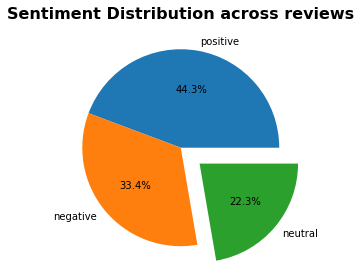

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.pie(df.Sentiment_analysis.value_counts(), labels = df.Sentiment_analysis.value_counts().index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.title(label="Sentiment Distribution across reviews",
          fontweight='bold', fontsize = 16)
plt.savefig("Sentiment_Distribution_across_reviews.png", format="png")

plt.show()

As visible from our plot above, most of our reviews are positive however not by much. a huge number of reviews are also neutral.

In [30]:
df2 = df[["Month_Year","Sentiment"]]
df2.head()
#df2.tail()

,Month_Year,Sentiment
0,May-2023,0
1,May-2023,1
2,May-2023,1
3,May-2023,-1
4,May-2023,-1


In [31]:
df3 = df2.groupby([ "Month_Year"])["Sentiment"].sum().reset_index()
df3.head()

,Month_Year,Sentiment
0,Apr-2019,3
1,Apr-2020,2
2,Apr-2021,2
3,Apr-2022,5
4,Apr-2023,-10


In [32]:
import datetime
 
# Function to convert string to datetime
def convert(date_time):
  # The format
    format = '%b-%Y'
    datetime_str = datetime.datetime.strptime(date_time, format)
 
    return datetime_str

df3["date"] = df3["Month_Year"].apply(convert)

# Sort DataFrame by date column
df3.sort_values(by='date', inplace = True)
df3.reset_index(inplace=True)
df3.head()

,index,Month_Year,Sentiment,date
0,25,Jul-2018,10,2018-07-01
1,5,Aug-2018,7,2018-08-01
2,53,Sep-2018,6,2018-09-01
3,48,Oct-2018,7,2018-10-01
4,44,Nov-2018,0,2018-11-01


In [33]:
df4 = df3[["Sentiment", "date"]]
df4.head()

,Sentiment,date
0,10,2018-07-01
1,7,2018-08-01
2,6,2018-09-01
3,7,2018-10-01
4,0,2018-11-01


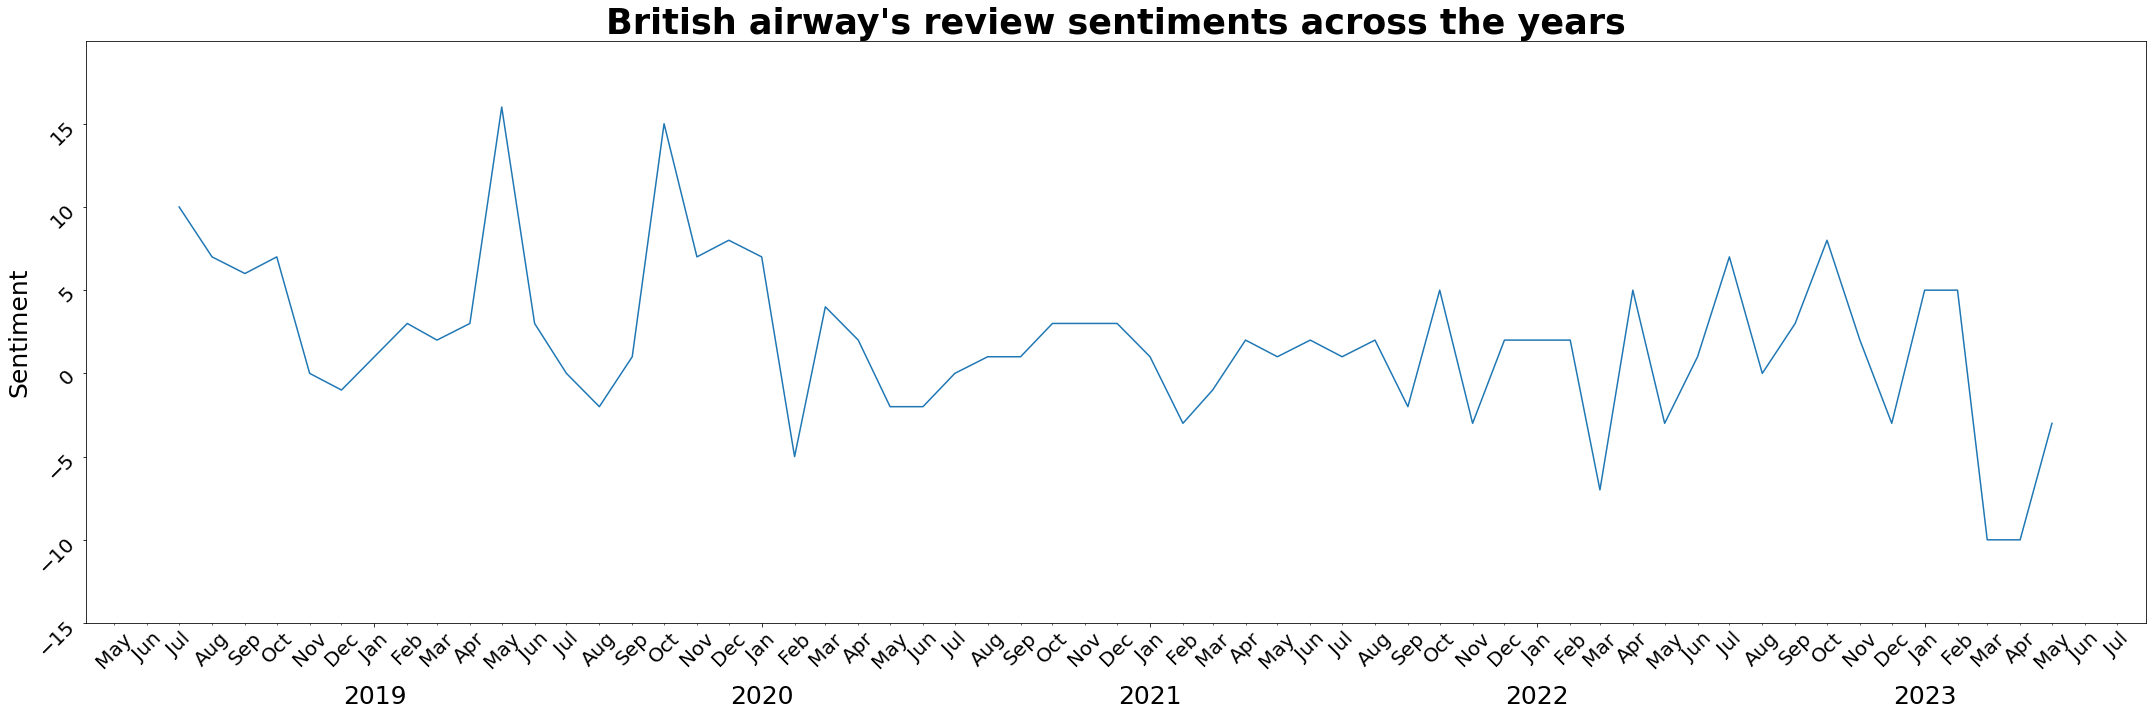

In [35]:
fig, ax=plt.subplots(1, 1, figsize=(30, 10))

ax.set_ylim(-15, 20)

sns.lineplot(data=df4, x="date", y="Sentiment")

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
# Minor ticks every year.
fmt_year = mdates.YearLocator()

ax.xaxis.set_minor_locator(fmt_month)
# '%b' to get the names of the month
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
ax.xaxis.set_major_locator(fmt_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# fontsize for month labels
ax.tick_params(labelsize=20, rotation = 45, which='both')
ax.set(xlabel=None)
# create a second x-axis beneath the first x-axis to show the year in YYYY format
sec_xaxis = ax.secondary_xaxis(-0.1)
sec_xaxis.xaxis.set_major_locator(fmt_year)
sec_xaxis.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Hide the second x-axis spines and ticks
sec_xaxis.spines['bottom'].set_visible(False)
sec_xaxis.tick_params(length=0, labelsize=25)

plt.yticks([-15, -10, -5, 0, 5, 10, 15])


plt.ylabel( "Sentiment", fontsize = 25)
plt.title("British airway's review sentiments across the years", fontweight = "bold", fontsize  = 35)

plt.tight_layout()
plt.show()

The above graph shows us that every year in feb there seems to be a spike of negative reviews since 2020. Most of the strong positive reviews prior to 2020. 2022 showed improvement in the sentiment from 2021 however not consitently. The start of 2023 hasn't look too good with the sentiments displayed by passengers.

## Wordcloud
We will now try to view the most common words amongs users who have a particular sentiment and see if we can identify some of the common themes where the problems lie

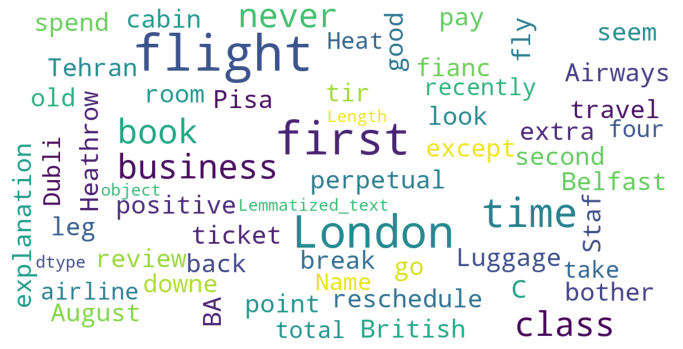

In [39]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

#generating a generic world cloud based on our reviews to see words that standout the most without any context

show_wordcloud(df.Lemmatized_text)

Some common terms we see occuring "London", "flight", "flight", "class" and "time". However, as there is no context to this visual we shall analize further based on sentiment to see where do they occur majorly.

In [49]:
neutral = df[df['Sentiment_analysis']=="neutral"][['Lemmatized_text']]
neutral.head()

,Lemmatized_text
0,flight time except Belfast London never Staf...
11,bad experience flight London Toronto get del...
25,make hard lounge experience staff take care ...
26,several delay canceled flight finally make C...
28,swear would never fly BA mess much try get B...


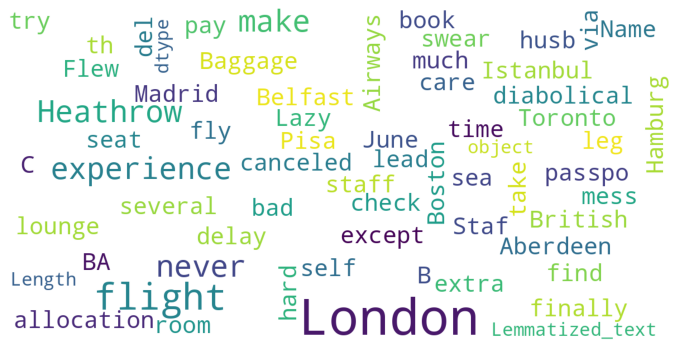

<Figure size 432x288 with 0 Axes>

In [60]:
show_wordcloud(neutral.Lemmatized_text)
plt.savefig("neutral_reviews.png", format="png")

We can see words like **"London", "flight", "Heathrow"** and **"experience"** seem to occur frequently among reviews that were classified as neutral.  

In [50]:
positive = df[df['Sentiment_analysis']=="positive"][['Lemmatized_text']]
positive.head()

,Lemmatized_text
1,second time fly BA first time positive Could...
2,go bother review flight seem perpetual downe...
8,Regarding aircraft seat business class seat ...
12,ground staff helpful Felt like want rush us ...
13,Second time BA Premium Economy newer aircraf...


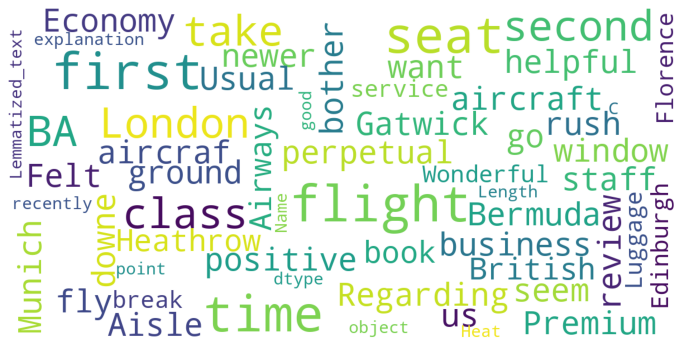

<Figure size 432x288 with 0 Axes>

In [59]:
show_wordcloud(positive.Lemmatized_text)
plt.savefig("positive_reviews.png", format="png")

We can see words like **"time", "flight", "seat", "Gatwick", "BA", "first", "Aisle", "second"** and **"Economy"** seem to occur frequently among reviews that were classified as positive. 

In [51]:
negative = df[df['Sentiment_analysis']=="negative"][['Lemmatized_text']]
negative.head()

,Lemmatized_text
3,book business class ticket fianc reschedule ...
4,never travel British Airways spend business ...
5,already Portugal contact today cancel return...
6,Terrible Avoid airline become regular practi...
7,Despite gold member British Airways staff He...


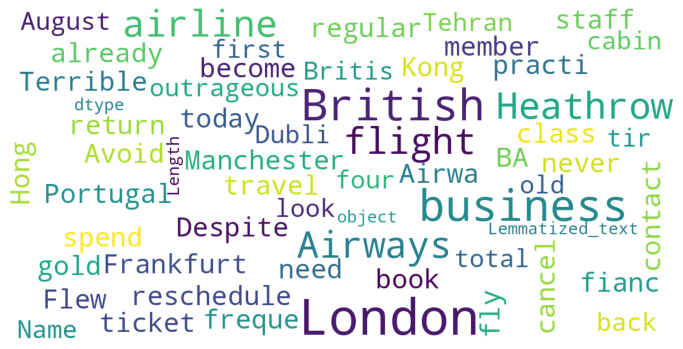

<Figure size 432x288 with 0 Axes>

In [58]:
show_wordcloud(negative.Lemmatized_text)
plt.savefig("negative_reviews.png", format="png")
plt.show()

We can see words like **"British", "London", "Airways", "business", "Heathrow", "airline"** and **"terrible"** seem to occur frequently among reviews that were classified as negative.